In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('../src'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from monte_carlo.options import CalcEuropeanOption

# Monte Carlo Method Explained

We are using a geometric Brownian Motion to model stock price evolution:

\begin{equation*}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation*}

The price of a vanilla option with expiry $T$ and payoff function $f$ is equal to:

\begin{equation*}
e^{-rT} E[f(S_T)],
\end{equation*}
under the risk-neutral measure.

Using Ito's Lemma we can solve for $S_T$:

\begin{equation*}
S_T = S_0 e^{(r - \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} N(0, 1)},
\end{equation*}

where $N(0, 1)$ is a standard normal distribution. Consequently we get:

\begin{equation*}
e^{-rT} E[f(S_T)] = e^{-rT} E[f(S_0 e^{(r - \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} N(0, 1)})].
\end{equation*}

Let $X_i \sim N(0, 1)$ be I.I.D., and let:

$$Y_i = f(S_0 e^{(r - \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} X_i}).$$

By Law of Large Numbers:

$$
e^{-rT} lim_{n -> \inf} \frac{1}{n} \sum_{i=1}^{n} Y_i =^{a.s.} e^{-rT} E[Y_1] = e^{-rT} E[f(S_T)].
$$


# Library Usage Examples

In [3]:
num_paths = 2**20
random_seed = 1234

## Pricing European Call Option

In [4]:
strike = 15
expiry = 0.25
spot = 30.14
vol = 0.332
r = 0.01

In [5]:
stats = CalcEuropeanOption.call_price_stats(strike,
                                      expiry, 
                                      spot,
                                      vol, 
                                      r, 
                                      num_paths,
                                      random_seed)

results = np.array(stats.get_results_so_far())
price_approx = results[-1][0]

In [6]:
def euro_call_option(S, K, T, r, sigma):
    """
    Exact formula for pricing of a European call option.
    
    Args:
        S (float): Spot price.
        K (float): Strike price.
        T (float): Expiry.
        r (float): Interest rate constant.
        sigma (float): Stock volatility.
        
    Returns:
        (float): Resulting call price.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

price_exact = euro_call_option(spot, strike, expiry, r, vol)

In [7]:
print("Option Call Price (using Monte Carlo) is: {}".format(price_approx))
print("Option Call Price (using Formula)     is: {}".format(price_exact))

Option Call Price (using Monte Carlo) is: 15.183104879184286
Option Call Price (using Formula)     is: 15.177462481558173


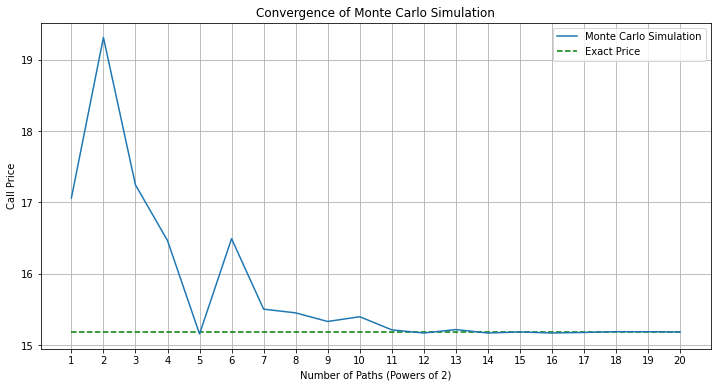

In [8]:
prices = results[:, 0]
iterations = np.log2(results[:, 1])
max_iter = max(iterations)

plt.figure(figsize=(12,6))
plt.xticks(np.arange(1, max_iter+1), ["{:g}".format(i) for i in np.arange(1, max_iter+1)])
plt.hlines(price_exact, 1, max_iter, colors='g', ls='--')
plt.plot(iterations, prices)

plt.xlabel('Number of Paths (Powers of 2)')
plt.ylabel('Call Price')
plt.grid()
plt.legend(['Monte Carlo Simulation', 'Exact Price'])
plt.title('Convergence of Monte Carlo Simulation')
plt.show()